<a href="https://colab.research.google.com/github/estbasili/BD-ML/blob/main/Spotify_v_final.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn import metrics

#== knn
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
#== SVM
import re
from sklearn.svm import SVC
from skimage.transform import resize
from skimage.io import imread
from collections import Counter
from skimage import color
#== BYS
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import precision_score
#== DTC
from sklearn.tree import DecisionTreeClassifier
#== Regresion Logistica
from sklearn.linear_model import LogisticRegression
#== Votacion Mayoritaria
from sklearn.ensemble import VotingClassifier



In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:

archivo ='/content/drive/MyDrive/UPSO/ML/Canciones_Spotify.csv'

#carga el archivo CSV en un dataframe y hago copia, ejemplo el del mes de Septiembre
df = pd.read_csv(archivo)
#elijo las columnas que son relevantes para mi estudio de seleccion de canciones con respecto al estado de animo de la persona
nuevo_df = df[['danceability', 'energy','valence','target','song_title','artist']]
nuevo_df


,danceability,energy,valence,target,song_title,artist
0,0.833,0.434,0.286,1,Mask Off,Future
1,0.743,0.359,0.588,1,Redbone,Childish Gambino
2,0.838,0.412,0.173,1,Xanny Family,Future
3,0.494,0.338,0.230,1,Master Of None,Beach House
4,0.678,0.561,0.904,1,Parallel Lines,Junior Boys
...,...,...,...,...,...,...
2012,0.584,0.932,0.211,0,Like A Bitch - Kill The Noise Remix,Kill The Noise
2013,0.894,0.892,0.867,0,Candy,Dillon Francis
2014,0.637,0.935,0.470,0,Habit - Dack Janiels & Wenzday Remix,Rain Man
2015,0.557,0.992,0.623,0,First Contact,Twin Moons


# Nota:

Para el analisis se eligieron las carceristicas que estan resaltadas en negrita.

Acousticness: Mide el grado en que una canción es acústica en lugar de electrónica o sintética. Si prefieres la música acústica y orgánica, esta característica puede ser relevante para ti.

**Danceability: Indica la capacidad de una canción para hacerte querer bailar. Es importante si estás buscando música para una pista de baile o una sesión de ejercicio.**

**Energy: Representa la intensidad y la energía general de una canción. Puede ser útil para elegir música que se adapte a tu estado de ánimo o actividad, ya sea relajada o enérgica.**

Instrumentalness: Mide la presencia de voces en una canción. Si prefieres música instrumental o deseas evitar canciones con letras, esta característica es relevante.

Liveness: Indica si una canción fue grabada en vivo. Si te gusta la autenticidad de las grabaciones en vivo, esta característica podría ser importante.

Loudness: Mide el volumen promedio de una canción. Puede ser relevante si prefieres canciones más suaves o más potentes.

Speechiness: Indica la presencia de palabras habladas en una canción. Puede ser útil si estás buscando música que contenga diálogos o narración.

**Valence: Refleja el carácter positivo o negativo de una canción. Si buscas música que coincida con tu estado de ánimo, esta característica es relevante.**

# Preparación de muestras para entrenamiento y testeo de los **clasificadores**

In [ ]:
# Selecciono las columnas de interés
danceability = nuevo_df['danceability']
energy = nuevo_df['energy']
valence = nuevo_df['valence']


# Calcula los valores estadísticos
variance_danceability = danceability.var()
std_danceability = danceability.std()
dispersion_danceability = max(danceability) - min(danceability)
mode_danceability = danceability.mode().values[0]
median_danceability = danceability.median()

variance_energy = energy.var()
std_energy = energy.std()
dispersion_energy = max(energy) - min(energy)
mode_energy = energy.mode().values[0]
median_energy = energy.median()

variance_valence = valence.var()
std_valence = valence.std()
dispersion_valence = max(valence) - min(valence)
mode_valence = valence.mode().values[0]
median_valence = valence.median()

# carateristicas de los datos tomados encuenta par el estudio
print('Descripcion de los datos tomados para el estudio:')
print()
print('> Caracteristica de Danceability')
print()
print(' - Varianza:',variance_danceability)
print(' - Desvio estandar:',std_danceability)
print(' - Dispersion:', dispersion_danceability)
print(' - Moda:',mode_danceability )
print(' - Mediana:', median_danceability)
print()
print('> Caracteristica de Energy')
print()
print(' - Varianza:',variance_energy)
print(' - Desvio estandar:',std_energy)
print(' - Dispersion:', dispersion_energy)
print(' - Moda:',mode_energy)
print(' - Mediana:', median_energy)
print()
print('> Caracteristica de Valence')
print()
print(' - Varianza:',variance_valence)
print(' - Desvio estandar:',std_valence)
print(' - Dispersion:', dispersion_valence)
print(' - Moda:',mode_valence)
print(' - Mediana:', median_valence)

Descripcion de los datos tomados para el estudio:

> Caracteristica de Danceability

 - Varianza: 0.025930328348915174
 - Desvio estandar: 0.16102896742175046
 - Dispersion: 0.862
 - Moda: 0.683
 - Mediana: 0.631

> Caracteristica de Energy

 - Varianza: 0.04421473828192015
 - Desvio estandar: 0.21027300892392287
 - Dispersion: 0.9832
 - Moda: 0.857
 - Mediana: 0.715

> Caracteristica de Valence

 - Varianza: 0.0611055997593373
 - Desvio estandar: 0.24719546872735612
 - Dispersion: 0.9572
 - Moda: 0.16
 - Mediana: 0.492


De los datos seleccionados para el estudio podemos hacer el siguiente analisis:

>Danceability:

La varianza (0.0259) es baja, lo que indica que los valores tienden a estar cerca de la media.
El desvío estándar es relativamente bajo (0.161), por lo que, los valores están agrupados alrededor de la media.
La dispersión es de (0.862), lo que podría interpretarse como que los valores están distribuidos en un rango relativamente estrecho.
La moda es (0.683), este valor es el más frecuente.
La mediana es (0.631), lo que indica que la mitad de los valores son menores o iguales a 0.631 y la otra mitad son mayores o iguales a 0.631.

>Energy:

La varianza es moderada (0.0442), lo que sugiere una dispersión moderada de los valores alrededor de la media.
El desvío estándar de (0.21), indica una mayor dispersión de los valores que Danceability.
La dispersión es de (0.9832), lo que sugiere una gama más amplia de valores.
La moda es (0.857), este valor es el más frecuente en los datos.
La mediana es (0.715), lo que indica que la mitad de los valores son menores o iguales a 0.715 y la otra mitad son mayores o iguales a 0.715.

>Valence:

La varianza (0.0611) es la más alta de las tres características, lo que sugiere una mayor dispersión de los valores alrededor de la media.
El desvío estándar (0.247) es el más alto de las tres características, lo que indica una dispersión significativa de los valores.
La dispersión es de(0.9572), lo que sugiere una gama amplia de valores.
La moda es (0.16), este valor es el más frecuente en los datos.
La mediana es (0.492), lo que indica que la mitad de los valores son menores o iguales a 0.492 y la otra mitad son mayores o iguales a 0.492.

Datos a presentar:

Totalidad de datos : 2017
Totalidad de datos para entrenar:1613
Totalidad de datos para testeo: 404

Distribución de muestras a presentar para entrenar el clasificador:

> Cantidad con target 0 : 816
> Cantidad con target 1 : 797

Distribución de muestras a presentar para testear el clasificador:

> Cantidad de target 1 : 200
> Cantidad de target 0 : 204



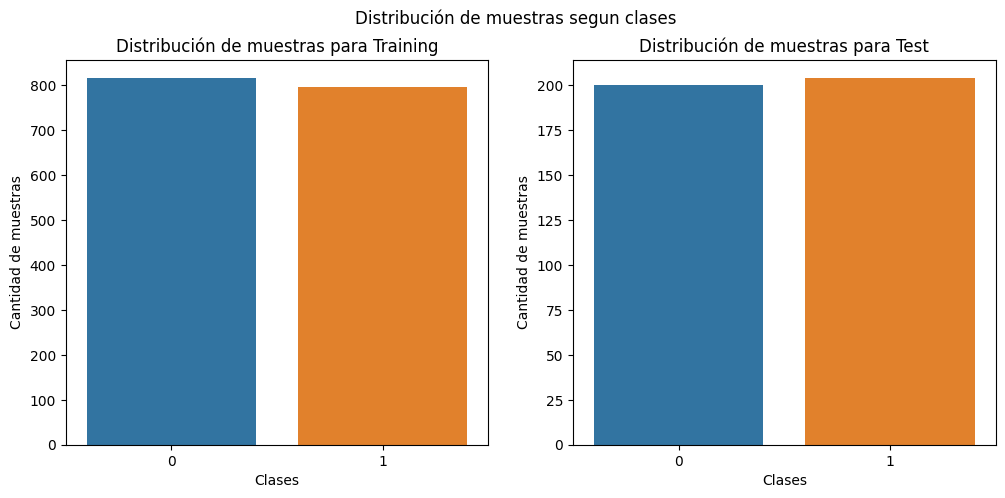

In [ ]:
#Preparacion de muestras para enternamiento y testeo de los clasificadores

t_size = 0.2 # divisor de arreglos para entrenamiento y testeo

# Divido los datos en características (X) y la variable target (Y) que es la que quiero predecir
X = df[['danceability', 'energy', 'valence']]
y = df['target']

# Analisis de las datos  para entrenamiento y testeo
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= t_size, random_state=0) #random_state = 0  para congelar el aleatorio

training = X_train.copy()
training ['target'] = y_train.copy()

tester = X_test.copy()
tester ['target'] = y_test.copy()

print('Datos a presentar:\n')
print(f'Totalidad de datos : {len(X)}')
print(f'Totalidad de datos para entrenar:{ len(X_train) }')
print(f'Totalidad de datos para testeo: { len(X_test) }\n')

# analizo como se distribuyeron las muestras
cant_class_train = np.asarray( Counter(y_train).most_common())
cant_train = np.reshape(cant_class_train[:,1:],(1,2))


print(f'Distribución de muestras a presentar para entrenar el clasificador:\n')
print(f'> Cantidad con target 0 : {cant_train[0][0]}')
print(f'> Cantidad con target 1 : {cant_train[0][1]}\n')

cant_class_test = np.asarray( Counter(y_test).most_common())
cant_test = np.reshape(cant_class_test[:,1:],(1,2))

print(f'Distribución de muestras a presentar para testear el clasificador:\n')
print(f'> Cantidad de target 1 : {cant_test[0][1]}')
print(f'> Cantidad de target 0 : {cant_test[0][0]}\n')

figure,axis = plt.subplots(1,2)
figure.set_size_inches((12,5))
figure.suptitle("Distribución de muestras segun clases")
sns.barplot(x=[0,1],y=cant_train[0],ax=axis[0]).set(title='Distribución de muestras para Training', xlabel='Clases', ylabel='Cantidad de muestras')
sns.barplot(x=[1,0],y=cant_test[0], ax=axis[1]).set(title='Distribución de muestras para Test', xlabel='Clases', ylabel='Cantidad de muestras')
plt.show()



In [ ]:
# Funciones para analisis de las muestras del conjunto de training y tester

def Descripcion(data):
  # Filtro los datos para "target" igual a 1
  data_target_1 = data[data['target'] == 1]

  # Filtro los datos para "target" igual a 0
  data_target_0 = data[data['target'] == 0]

  def calcular_estadisticas(columna):
      variance = np.trunc(columna.var() * 10000) / 10000
      std = np.trunc(columna.std() * 10000) / 10000
      mode = np.trunc(columna.mode().values[0] * 10000) / 10000
      median = np.trunc(columna.median() * 10000) / 10000
      dispersion = np.trunc((max(columna) - min(columna)) * 10000) / 10000
      return variance, std, mode, median, dispersion

  # Estadísticas para "target" igual a 1
  variance_target_1_danceability, std_target_1_danceability, mode_target_1_danceability, median_target_1_danceability, dispersion_target_1_danceability = calcular_estadisticas(data_target_1['danceability'])
  variance_target_1_energy, std_target_1_energy, mode_target_1_energy, median_target_1_energy, dispersion_target_1_energy = calcular_estadisticas(data_target_1['energy'])
  variance_target_1_valence, std_target_1_valence, mode_target_1_valence, median_target_1_valence, dispersion_target_1_valence = calcular_estadisticas(data_target_1['valence'])

  # Estadísticas para "target" igual a 0
  variance_target_0_danceability, std_target_0_danceability, mode_target_0_danceability, median_target_0_danceability, dispersion_target_0_danceability = calcular_estadisticas(data_target_0['danceability'])
  variance_target_0_energy, std_target_0_energy, mode_target_0_energy, median_target_0_energy, dispersion_target_0_energy = calcular_estadisticas(data_target_0['energy'])
  variance_target_0_valence, std_target_0_valence, mode_target_0_valence, median_target_0_valence, dispersion_target_0_valence = calcular_estadisticas(data_target_0['valence'])

  # Imprimo estadísticas para "target" igual a 1

  print('Caracteristicas de las muestras de clase 1:')
  print()
  print('> Caracteristica de Danceability')
  print()
  print(' - Varianza:',variance_target_1_danceability)
  print(' - Desvio estandar:',std_target_1_danceability)
  print(' - Dispersion:', dispersion_target_1_danceability)
  print(' - Moda:',mode_target_1_danceability )
  print(' - Mediana:', median_target_1_danceability)
  print()
  print('> Caracteristica de Energy')
  print()
  print(' - Varianza:',variance_target_1_energy)
  print(' - Desvio estandar:',std_target_1_energy)
  print(' - Dispersion:', dispersion_target_1_energy)
  print(' - Moda:',mode_target_1_energy )
  print(' - Mediana:', median_target_1_energy)
  print()
  print('> Caracteristica de Valence')
  print()
  print(' - Varianza:',variance_target_1_valence)
  print(' - Desvio estandar:',std_target_1_valence)
  print(' - Dispersion:', dispersion_target_1_valence)
  print(' - Moda:',mode_target_1_valence)
  print(' - Mediana:', median_target_1_valence)

  # Imprimo estadísticas para "target" igual a 0
  print()
  print('Caracteristicas de las muestras de clase 0:')
  print()
  print('> Caracteristica de Danceability')
  print()
  print(' - Varianza:',variance_target_0_danceability)
  print(' - Desvio estandar:',std_target_0_danceability)
  print(' - Dispersion:', dispersion_target_0_danceability)
  print(' - Moda:',mode_target_0_danceability )
  print(' - Mediana:', median_target_0_danceability)
  print()
  print('> Caracteristica de Energy')
  print()
  print(' - Varianza:',variance_target_0_energy)
  print(' - Desvio estandar:',std_target_0_energy)
  print(' - Dispersion:', dispersion_target_0_energy)
  print(' - Moda:',mode_target_0_energy )
  print(' - Mediana:', median_target_0_energy)
  print()
  print('> Caracteristica de Valence')
  print()
  print(' - Varianza:',variance_target_0_valence)
  print(' - Desvio estandar:',std_target_0_valence)
  print(' - Dispersion:', dispersion_target_0_valence)
  print(' - Moda:',mode_target_0_valence)
  print(' - Mediana:', median_target_0_valence)

def Graficar(data):
  # Filtro las muestras para "target" igual a 1
  data_target_1 = data[data['target'] == 1]

  # Filtro las muestras para "target" igual a 0
  data_target_0 = data[data['target'] == 0]

  # Creo un solo gráfico de dispersión con tres subgráficos
  fig, axs = plt.subplots(1, 3, figsize=(18, 6))

  # Gráfico de dispersión para "Danceability"
  axs[0].scatter(data_target_1['danceability'], range(len(data_target_1)), label='Target 1', color='blue', marker='o', alpha=0.5)
  axs[0].scatter(data_target_0['danceability'], range(len(data_target_0)), label='Target 0', color='red', marker='x', alpha=0.5)
  axs[0].set_xlabel('Danceability')
  axs[0].set_ylabel('Índice de la Fila')
  axs[0].set_title('Danceability (Target 1 vs. Target 0)')

  # Gráfico de dispersión para "Energy"
  axs[1].scatter(data_target_1['energy'], range(len(data_target_1)), label='Target 1', color='blue', marker='o', alpha=0.5)
  axs[1].scatter(data_target_0['energy'], range(len(data_target_0)), label='Target 0', color='red', marker='x', alpha=0.5)
  axs[1].set_xlabel('Energy')
  axs[1].set_ylabel('Índice de la Fila')
  axs[1].set_title('Energy (Target 1 vs. Target 0)')

  # Gráfico de dispersión para "Valence"
  axs[2].scatter(data_target_1['valence'], range(len(data_target_1)), label='Target 1', color='blue', marker='o', alpha=0.5)
  axs[2].scatter(data_target_0['valence'], range(len(data_target_0)), label='Target 0', color='red', marker='x', alpha=0.5)
  axs[2].set_xlabel('Valence')
  axs[2].set_ylabel('Índice de la Fila')
  axs[2].set_title('Valence (Target 1 vs. Target 0)')

  axs[0].legend()

  # Ajusto el espaciado entre los subgráficos
  plt.tight_layout()

  # Creo un solo gráfico de dispersión con tres subgráficos en orientación vertical
  fig, axs = plt.subplots(3, 1, figsize=(8, 18))

  # Gráfico de dispersión para "Danceability"
  axs[0].scatter(data_target_1['energy'], data_target_1['danceability'], label='Target 1', color='blue', marker='o', alpha=0.5)
  axs[0].scatter(data_target_0['energy'], data_target_0['danceability'], label='Target 0', color='red', marker='x', alpha=0.5)
  axs[0].set_xlabel('Energy')
  axs[0].set_ylabel('Danceability')
  axs[0].set_title('Scatter Plot para Energy y Danceability (Target 1 vs. Target 0)')
  axs[0].legend()

  # Gráfico de dispersión para "Valence"
  axs[1].scatter(data_target_1['valence'], data_target_1['danceability'], label='Target 1', color='blue', marker='o', alpha=0.5)
  axs[1].scatter(data_target_0['valence'], data_target_0['danceability'], label='Target 0', color='red', marker='x', alpha=0.5)
  axs[1].set_xlabel('Valence')
  axs[1].set_ylabel('Danceability')
  axs[1].set_title('Scatter Plot para Valence y Danceability (Target 1 vs. Target 0)')
  axs[1].legend()

  # Gráfico de dispersión para "Energy"
  axs[2].scatter(data_target_1['valence'], data_target_1['energy'], label='Target 1', color='blue', marker='o', alpha=0.5)
  axs[2].scatter(data_target_0['valence'], data_target_0['energy'], label='Target 0', color='red', marker='x', alpha=0.5)
  axs[2].set_xlabel('Valence')
  axs[2].set_ylabel('Energy')
  axs[2].set_title('Scatter Plot para Valence y Energy (Target 1 vs. Target 0)')
  axs[2].legend()

  plt.tight_layout()

  # Muestro el gráfico
  plt.show()



Caracteristica del grupo de entrenamiento

Caracteristicas de las muestras de clase 1:

> Caracteristica de Danceability

 - Varianza: 0.0272
 - Desvio estandar: 0.1652
 - Dispersion: 0.84
 - Moda: 0.683
 - Mediana: 0.677

> Caracteristica de Energy

 - Varianza: 0.0299
 - Desvio estandar: 0.173
 - Dispersion: 0.958
 - Moda: 0.74
 - Mediana: 0.709

> Caracteristica de Valence

 - Varianza: 0.0604
 - Desvio estandar: 0.2459
 - Dispersion: 0.9561
 - Moda: 0.357
 - Mediana: 0.521

Caracteristicas de las muestras de clase 0:

> Caracteristica de Danceability

 - Varianza: 0.0237
 - Desvio estandar: 0.1541
 - Dispersion: 0.8149
 - Moda: 0.428
 - Mediana: 0.598

> Caracteristica de Energy

 - Varianza: 0.0594
 - Desvio estandar: 0.2439
 - Dispersion: 0.9822
 - Moda: 0.896
 - Mediana: 0.721

> Caracteristica de Valence

 - Varianza: 0.0595
 - Desvio estandar: 0.244
 - Dispersion: 0.9392
 - Moda: 0.441
 - Mediana: 0.471



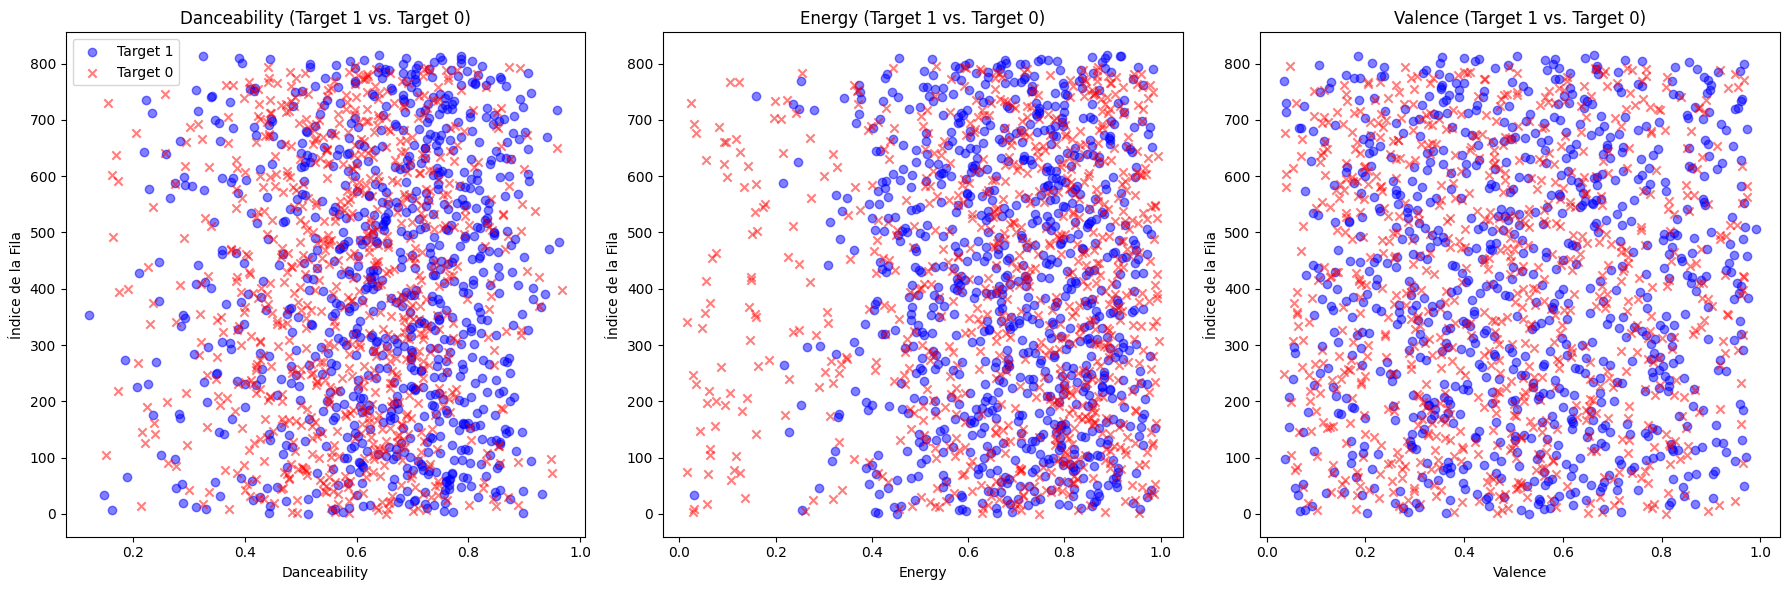

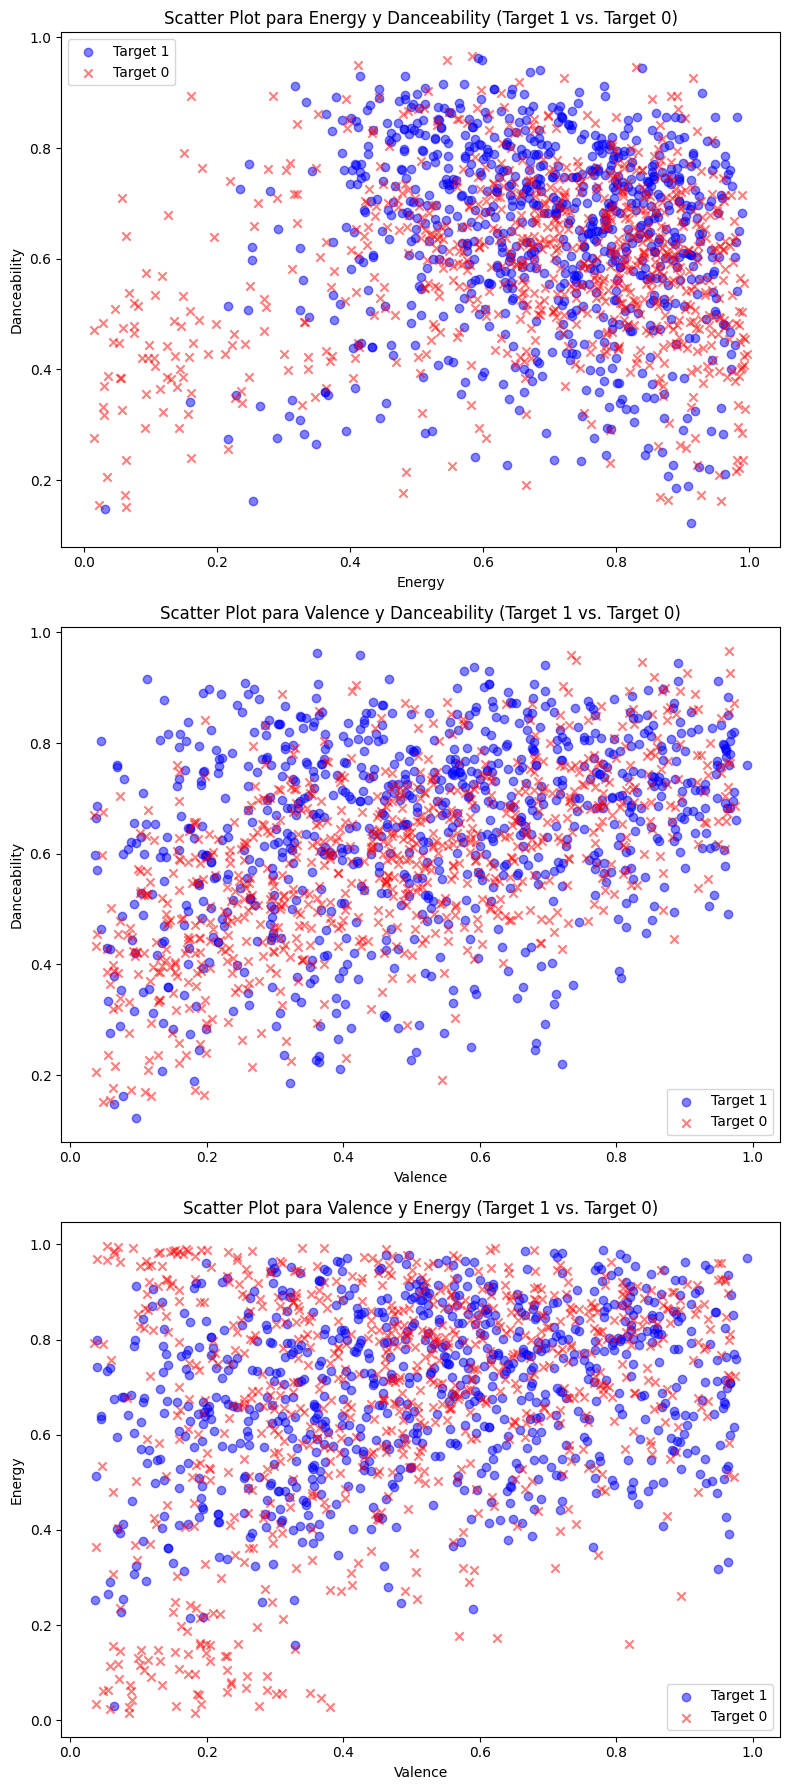

In [ ]:
print('Caracteristica del grupo de entrenamiento')
print()
Descripcion(training)
print()
Graficar(training)

Caracteristica del grupo de testeo

Caracteristicas de las muestras de clase 1:

> Caracteristica de Danceability

 - Varianza: 0.0239
 - Desvio estandar: 0.1546
 - Dispersion: 0.809
 - Moda: 0.507
 - Mediana: 0.654

> Caracteristica de Energy

 - Varianza: 0.0336
 - Desvio estandar: 0.1833
 - Dispersion: 0.8898
 - Moda: 0.793
 - Mediana: 0.705

> Caracteristica de Valence

 - Varianza: 0.0639
 - Desvio estandar: 0.2529
 - Dispersion: 0.9357
 - Moda: 0.668
 - Mediana: 0.5615

Caracteristicas de las muestras de clase 0:

> Caracteristica de Danceability

 - Varianza: 0.0231
 - Desvio estandar: 0.1522
 - Dispersion: 0.8
 - Moda: 0.534
 - Mediana: 0.5985

> Caracteristica de Energy

 - Varianza: 0.0521
 - Desvio estandar: 0.2284
 - Dispersion: 0.9819
 - Moda: 0.725
 - Mediana: 0.7264

> Caracteristica de Valence

 - Varianza: 0.0601
 - Desvio estandar: 0.2453
 - Dispersion: 0.919
 - Moda: 0.1019
 - Mediana: 0.448



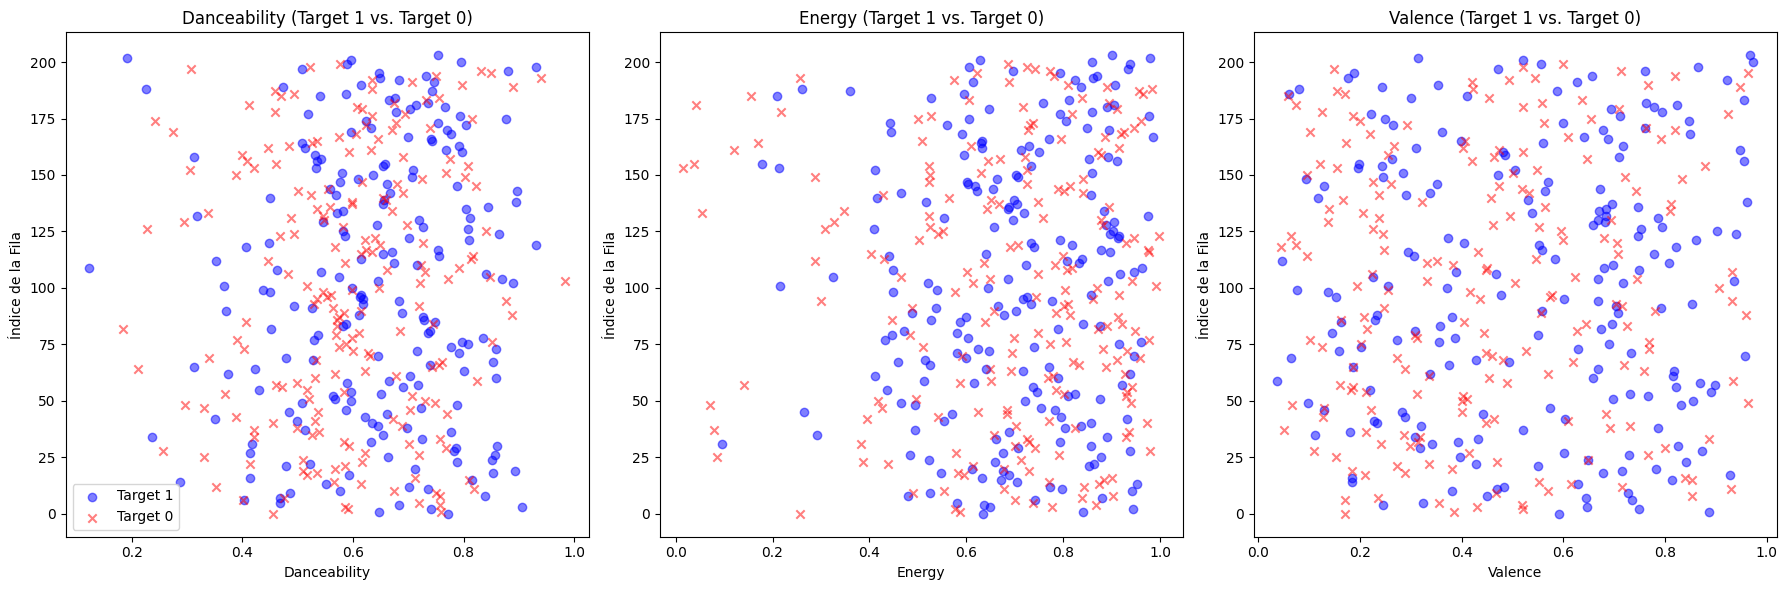

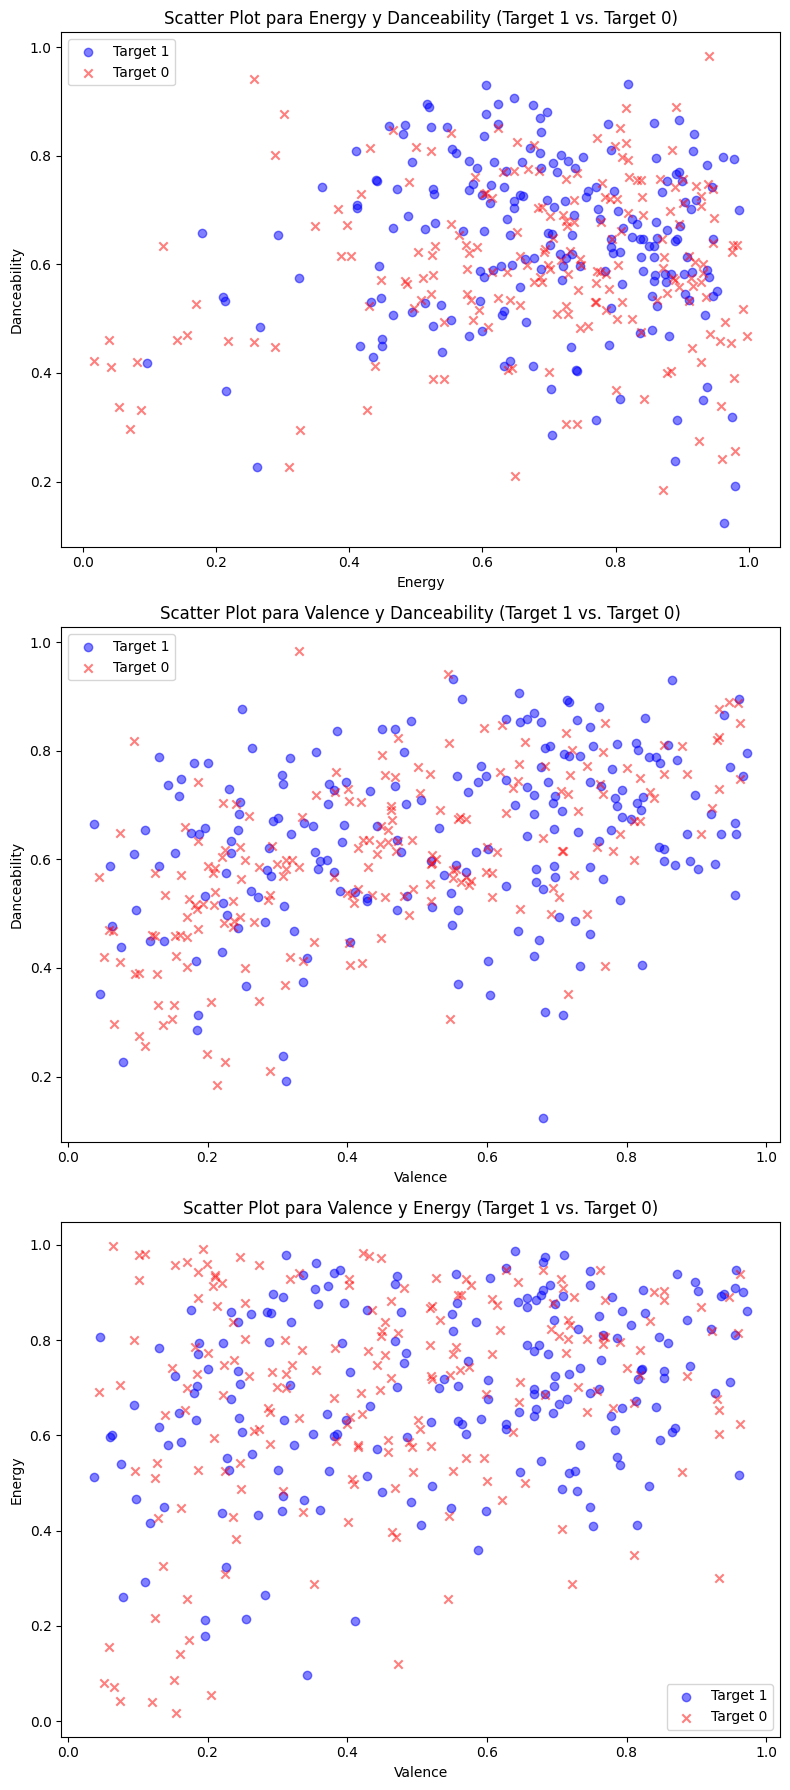

In [ ]:
print('Caracteristica del grupo de testeo')
print()
Descripcion(tester)
print()
Graficar(tester)

### **Diseño de clasificadores**

# Clasificador **Knn**


 El modelo del Clasificador knn con:
 > Distribución de muestras:0.2

 Obtuvo una precisión media de =  0.7445753254804711 
 Accuracy: 0.5693069306930693

              precision    recall  f1-score   support

           0       0.56      0.57      0.57       200
           1       0.57      0.56      0.57       204

    accuracy                           0.57       404
   macro avg       0.57      0.57      0.57       404
weighted avg       0.57      0.57      0.57       404



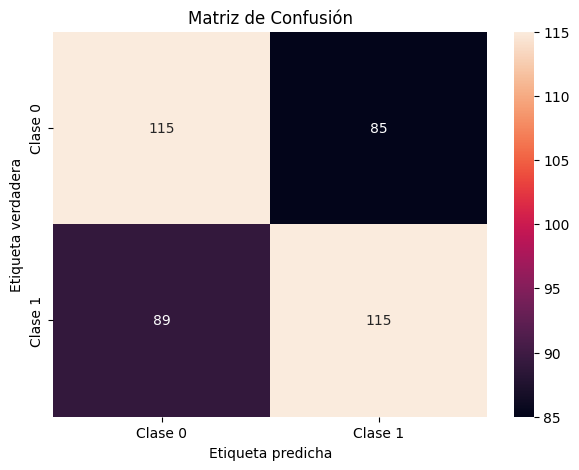

In [ ]:
from sklearn import neighbors
# clasificador K_Means
n_vecinos = 5 # tomo los cinco vecinos

# Creo una instancia del clasificador KNN
knn = KNeighborsClassifier(n_neighbors = n_vecinos)

# entreno el modelo a los datos de entrenamiento
knn.fit(X_train, y_train)

# predicciones en el conjunto de prueba
y_pred = knn.predict(X_test)

# Evaluo el modelo
score = knn.score(X_train, y_train)
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)
confusion = confusion_matrix(y_test, y_pred)

#neighbors= knn.n_neighbors
#weights= knn.weights
#p= knn.p
#print(neighbors)
#print(weights)
#print(p)
print('\n El modelo del Clasificador knn con:')
print(f' > Distribución de muestras:{t_size}')
print('\n Obtuvo una precisión media de =' , '\033[1m\033[91m' ,score, '\033[0m')
print(f' Accuracy: {accuracy}\n')
print(report)


plt.figure(figsize=(7,5))
sns.heatmap(confusion, annot=True, fmt='g', xticklabels=['Clase 0', 'Clase 1'], yticklabels=['Clase 0', 'Clase 1'])
plt.xlabel('Etiqueta predicha')
plt.ylabel('Etiqueta verdadera')
plt.title('Matriz de Confusión')
plt.show()



## Reporte de clasificación

***Precisión media (Average Precision):***  
  La precisión media es aproximadamente 0.7446,significa que, en promedio, el modelo tiene una precisión del 74.46% en todas las clases del conjunto de datos de prueba.Por lo que tiene un rendimiento aceptable.


***Precisión del modelo:***

  La precisión del modelo es aproximadamente 0.569, lo que significa que alrededor del 56.9% de las predicciones positivas son correctas.


***Precision (Precisión):***

  Para la clase 0, la precisión es aproximadamente 0.59, lo que significa que alrededor del 59% de las predicciones de la clase 0 son correctas. Para la clase 1, la precisión es aproximadamente 0.57, lo que significa que alrededor del 57% de las predicciones de la clase 1 son correctas.

***Recall (Sensibilidad):***

  Para la clase 0, el recall es aproximadamente 0.57, lo que significa que el modelo identificó correctamente alrededor del 57% de los ejemplos de la clase 0. Para la clase 1, el recall es aproximadamente 0.56, lo que significa que el modelo identificó correctamente alrededor del 56% de los ejemplos de la clase 1.

***F1-score (Puntuación F1):***

  El puntaje F1 es una medida que combina la precisión y el recall en una sola métrica. Proporciona un equilibrio entre ambas métricas. El valor F1-score es aproximadamente 0.57 para la clase 0 y 0.57 para la clase 1.

***Accuracy (Exactitud):***

  La exactitud es la proporción de predicciones correctas en general en el conjunto de datos. En este caso, la exactitud es aproximadamente 0.57, lo que significa que alrededor del 57% de las predicciones totales son correctas.



# Métricas que resumen el rendimiento promedio del modelo en todas las clases:


***Macro avg (Promedio Macro):***

   Esta métrica toma el promedio de las métricas (precisión, recall y puntaje F1) calculadas para cada clase por separado y asigna el mismo peso a cada clase. En este caso, el promedio macro para la precisión es 0.57, para el recall es 0.57 y para el puntaje F1 es 0.57. Esto significa que se calcula un promedio simple de las métricas de todas las clases sin importar su tamaño o importancia relativa en el conjunto de datos.

***Weighted avg (Promedio Ponderado):***

  Esta métrica también calcula un promedio de las métricas (precisión, recall y puntaje F1) para todas las clases, pero en este caso, asigna un peso a cada clase según su proporción en el conjunto de datos. Esto significa que las clases con más ejemplos tienen un mayor impacto en el promedio ponderado. En este caso, el promedio ponderado para la precisión es 0.57, para el recall es 0.57 y para el puntaje F1 es 0.57, al igual que en el promedio macro, ya que las clases tienen números similares de ejemplos.

# Clasificador **SVM**


 El modelo del Clasificador SVC con:
> Distribución de muestras:0.2

 Obtuvo una precisión media de =  0.5796652200867948 
 Accuracy: 0.5767326732673267

              precision    recall  f1-score   support

           0       0.59      0.49      0.54       200
           1       0.57      0.66      0.61       204

    accuracy                           0.58       404
   macro avg       0.58      0.58      0.57       404
weighted avg       0.58      0.58      0.57       404



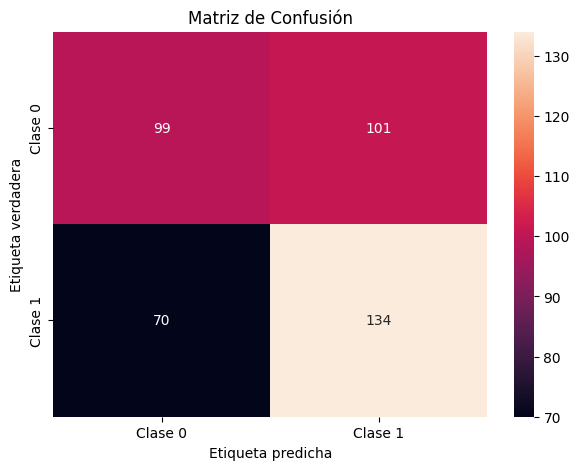

In [ ]:
# SVC
clf = SVC(kernel='linear', C=1.0, random_state=0)

#entreno modelo
clf.fit(X_train, y_train)

# predicciones en el conjunto de prueba
y_pred = clf.predict(X_test)

# Evaluo el modelo
score = clf.score(X_train, y_train)
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)
confusion = confusion_matrix(y_test, y_pred)

print('\n El modelo del Clasificador SVC con:')
print(f'> Distribución de muestras:{t_size}')
print('\n Obtuvo una precisión media de =' , '\033[1m\033[91m' ,score, '\033[0m')
print(f' Accuracy: {accuracy}\n')
print(report)

plt.figure(figsize=(7,5))
sns.heatmap(confusion, annot=True, fmt='g', xticklabels=['Clase 0', 'Clase 1'], yticklabels=['Clase 0', 'Clase 1'])
plt.xlabel('Etiqueta predicha')
plt.ylabel('Etiqueta verdadera')
plt.title('Matriz de Confusión')
plt.show()

## Reporte de clasificación

***Precisión media (Average Precision):***  
  La precisión media es aproximadamente 0.57966,significa que, en promedio, el modelo tiene una precisión del 57.96% en todas las clases del conjunto de datos de prueba.Por lo que, esta haciendo predicciones poco precisas.


***Precisión del modelo:***

  La precisión del modelo es aproximadamente 0.5767, lo que significa que alrededor del 57.6% de las predicciones positivas son correctas.


***Precision (Precisión):***

  Para la clase 0, la precisión es aproximadamente 0.59, lo que significa que alrededor del 59% de las predicciones de la clase 0 son correctas. Para la clase 1, la precisión es aproximadamente 0.57, lo que significa que alrededor del 57% de las predicciones de la clase 1 son correctas.

***Recall (Sensibilidad):***

  Para la clase 0, el recall es aproximadamente 0.49, lo que significa que el modelo identificó correctamente alrededor del 49% de los ejemplos de la clase 0. Para la clase 1, el recall es aproximadamente 0.66, lo que significa que el modelo identificó correctamente alrededor del 66% de los ejemplos de la clase 1.

***F1-score (Puntuación F1):***

  El puntaje F1 es una medida que combina la precisión y el recall en una sola métrica. Proporciona un equilibrio entre ambas métricas. El valor F1-score es aproximadamente 0.54 para la clase 0 y 0.61 para la clase 1.

***Accuracy (Exactitud):***

  La exactitud es la proporción de predicciones correctas en general en el conjunto de datos. En este caso, la exactitud es aproximadamente 0.576, lo que significa que alrededor del 57.6% de las predicciones totales son correctas.



# Métricas que resumen el rendimiento promedio del modelo en todas las clases:


***Macro avg (Promedio Macro):***

   Esta métrica toma el promedio de las métricas (precisión, recall y puntaje F1) calculadas para cada clase por separado y asigna el mismo peso a cada clase. En este caso, el promedio macro para la precisión es 0.58, para el recall es 0.58 y para el puntaje F1 es 0.57. Esto significa que se calcula un promedio simple de las métricas de todas las clases sin importar su tamaño o importancia relativa en el conjunto de datos.

***Weighted avg (Promedio Ponderado):***

  Esta métrica también calcula un promedio de las métricas (precisión, recall y puntaje F1) para todas las clases, pero en este caso, asigna un peso a cada clase según su proporción en el conjunto de datos. Esto significa que las clases con más ejemplos tienen un mayor impacto en el promedio ponderado. En este caso, el promedio ponderado para la precisión es 0.58, para el recall es 0.58 y para el puntaje F1 es 0.57, al igual que en el promedio macro, ya que las clases tienen números similares de ejemplos.

# clasificador **Bayesiano**



Presicion del modelo: 
0.5655737704918032
Reporte de Clasificación:

              precision    recall  f1-score   support

           0       0.59      0.47      0.52       200
           1       0.57      0.68      0.62       204

    accuracy                           0.57       404
   macro avg       0.58      0.57      0.57       404
weighted avg       0.58      0.57      0.57       404



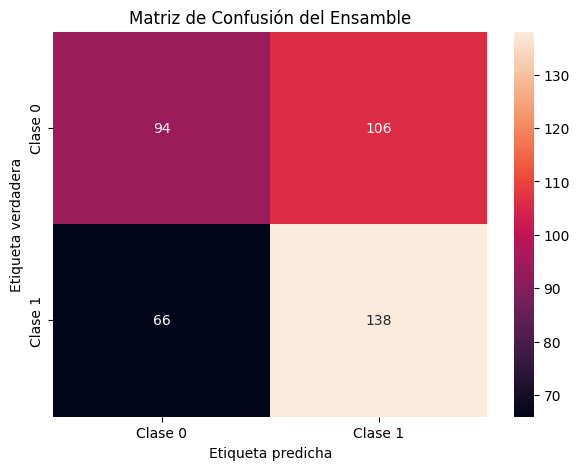

In [ ]:
#clasificador de Bayes
#instancio el clasificador
gnb = GaussianNB()

#clasificador de entrenamiento
gnb.fit(
    X_train,
    y_train
)
#realizo una prediccion con los datos de prueba
y_pred = gnb.predict(X_test)
#imprimo la precision
precision = precision_score(y_test,y_pred)
print("Presicion del modelo: ")
print(precision)
#imprimo resultados y matriz de confusion
print("Reporte de Clasificación:\n")
print(classification_report(y_test, y_pred))
c = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(7,5))
sns.heatmap(c, annot=True, fmt='g', xticklabels=['Clase 0', 'Clase 1'], yticklabels=['Clase 0', 'Clase 1'])
plt.xlabel('Etiqueta predicha')
plt.ylabel('Etiqueta verdadera')
plt.title('Matriz de Confusión del Ensamble')
plt.show()

Nota: el modelo del Bayes es un modelo de clasificacion simple sin necesidad de hiperparametros. Este modelo nos dio como resultado una precision de 0.56 el cual no es muy bueno clasificando estos datos.

El modelo tiene una buena respuesta clasificando la clase 1:
de 204 muestras clasifico bien 138, por el contrario de la clase 0 obtuvo menor rendimiento al clasificar de 200 muestras 94 estuvieron correctamente clasificadas.


# Clasificador **Árbol de Decisión**


 El modelo del Clasificador DTC con:

 Obtuvo una precisión media de =  0.6497210167389956 
 Accuracy: 0.5965346534653465

              precision    recall  f1-score   support

           0       0.59      0.58      0.59       200
           1       0.60      0.61      0.61       204

    accuracy                           0.60       404
   macro avg       0.60      0.60      0.60       404
weighted avg       0.60      0.60      0.60       404



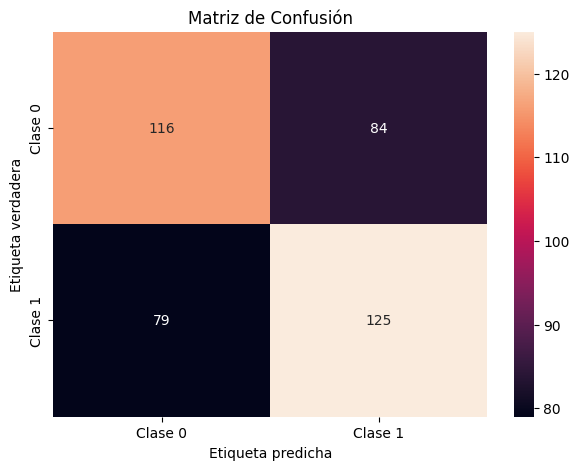

In [ ]:
#árbol de decisión

# Creo una instancia del clasificador de árbol de decisión
dtc = DecisionTreeClassifier()

# Ajusto el modelo a los datos de entrenamiento
dtc.fit(X_train, y_train)

# predicciones en el conjunto de prueba
y_pred = dtc.predict(X_test)

# Evaluo el modelo
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)
confusion = confusion_matrix(y_test, y_pred)

print('\n El modelo del Clasificador DTC con:')
print('\n Obtuvo una precisión media de =' , '\033[1m\033[91m' ,score, '\033[0m')
print(f' Accuracy: {accuracy}\n')
print(report)

plt.figure(figsize=(7,5))
sns.heatmap(confusion, annot=True, fmt='g', xticklabels=['Clase 0', 'Clase 1'], yticklabels=['Clase 0', 'Clase 1'])
plt.xlabel('Etiqueta predicha')
plt.ylabel('Etiqueta verdadera')
plt.title('Matriz de Confusión')
plt.show()
#criterion_predeterminado = dtc.criterion
#max_depth_predeterminado = dtc.max_depth
#min_sample_split = dtc.min_samples_split
#min_samples_leaf = dtc.min_samples_leaf

#print("Criterio predeterminado:", criterion_predeterminado)
#print('Profundida maxima predeterminada:', max_depth_predeterminado)
#print('numero minimo de muestras requeridas para dividir el nodo:',min_sample_split )
#print('numero minimo de muestras requeridas en una hoja:', min_samples_leaf )


Nota:
Podemos decir que, el modelo DTC tiene una precisión media del 64.97% en todas las clases del conjunto de datos de prueba. Por lo que tiene un rendimiento aceptable. Dando como resultado: 116 predicciones verdaderas de target 0 en 200 muestras de dicha clase.Y 125 predicciones verdaderas de target 1 en 204 muestras de target 1.

Nota2: La conclusion anterior fue obtenida luego de hacer una iteracion con los parametros predeterminados:
> criterion: gini
>
> max_depth: none
>
> min_sample_split: 2
>
> min_sample_leaf: 1


# Clasificador **Regresión Logística**


Presicion del modelo: 
0.5796460176991151
Reporte de Clasificación:

              precision    recall  f1-score   support

           0       0.59      0.53      0.56       200
           1       0.58      0.64      0.61       204

    accuracy                           0.58       404
   macro avg       0.58      0.58      0.58       404
weighted avg       0.58      0.58      0.58       404



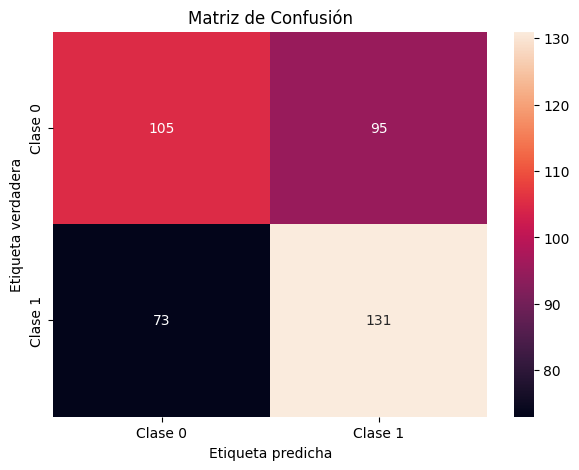

In [ ]:
#instancio el modelo de regresion logistica sin hiperparametros
modelLR= LogisticRegression()
#entreno al modelo con los datos de entrenamiento
modelLR.fit(X_train, y_train)
#realizo una prediccion con el modelo entrenado
y_pred = modelLR.predict(X_test)
#imprimo la precision
precision = precision_score(y_test,y_pred)
print("Presicion del modelo: ")
print(precision)
# Evaluo el modelo
print("Reporte de Clasificación:\n")
print(classification_report(y_test, y_pred))

#matrix de confusion
c = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(7,5))
sns.heatmap(c, annot=True, fmt='g', xticklabels=['Clase 0', 'Clase 1'], yticklabels=['Clase 0', 'Clase 1'])
plt.xlabel('Etiqueta predicha')
plt.ylabel('Etiqueta verdadera')
plt.title('Matriz de Confusión')
plt.show()

Nota: En este modelo de Regresion Logistica se observa que con los hiperparametros predeterminados.

Los resultados de la clasificacion son:

Precision: 0.57

Es un modelo bueno, observando la matriz de confusion el cual da una clasificacion mejor a el modelo de Bayes por clasificar un poco mejor la clase 0 y bajando el rendimiento en la clase 1

Clase 0 : 105/200 muestras clasificada correctamente,

Clase 1 : 131/204 muestras clasificada correctamente

# **Ajuste de Hiper parametros a los modelos** - Busqueda de Hiperparametros por Grid Search y Random Search

librerias a utilizar para encontrar los mejores parametros

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import uniform, randint

HiperParametros para Knn

El modelo del Clasificador knn con los hiperparametros mas optimos segun GridSearch:

> Distribución de muestras:0.2
> Numeros de vecinos: 7
> Tipo de ponderacion: uniform
> Valor de P : 2

 Obtuvo una precisión media de =  0.7141971481711097 
 Accuracy: 0.5767326732673267

              precision    recall  f1-score   support

           0       0.57      0.56      0.57       200
           1       0.58      0.59      0.58       204

    accuracy                           0.58       404
   macro avg       0.58      0.58      0.58       404
weighted avg       0.58      0.58      0.58       404



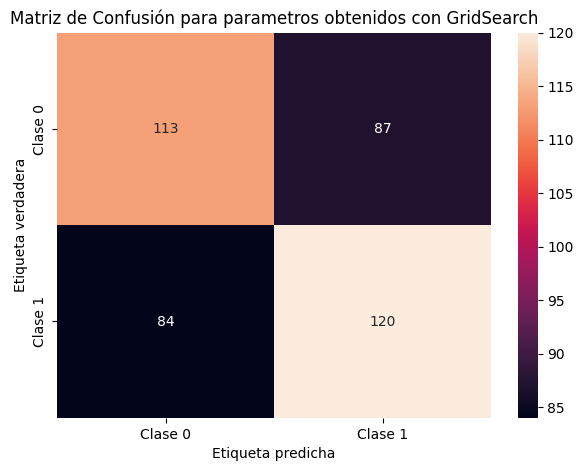


El modelo del Clasificador knn con los hiperparametros mas optimos segun RandomSearch:

> Distribución de muestras:0.2
> Numeros de vecinos: 11
> Tipo de ponderacion: uniform
> Valor de P : 2

 Obtuvo una precisión media de =  0.698698078115313 
 Accuracy: 0.5792079207920792

              precision    recall  f1-score   support

           0       0.57      0.58      0.58       200
           1       0.58      0.58      0.58       204

    accuracy                           0.58       404
   macro avg       0.58      0.58      0.58       404
weighted avg       0.58      0.58      0.58       404



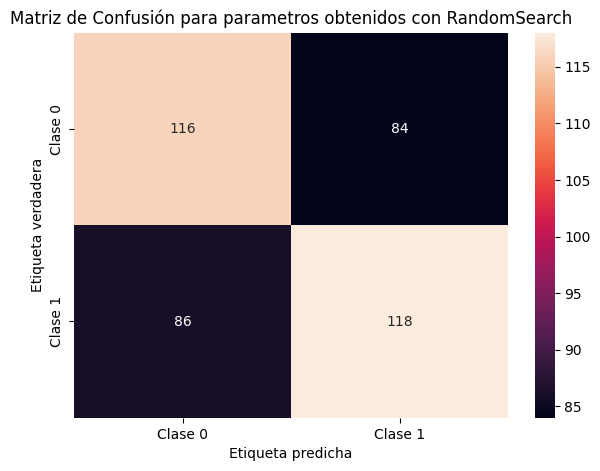

In [ ]:
# Defino el clasificador KNN para hiper de GridSearch
knn_GS = KNeighborsClassifier()
# Defino el clasificador KNN para hiper de RandomSearch
knn_RS= KNeighborsClassifier()

# Defino el diccionario de hiperparámetros y sus valores posibles para GridSearch
param_grid_GS = {
    'n_neighbors': [3, 5, 7],  # Número de vecinos
    'weights': ['uniform', 'distance'],  # Tipo de ponderación 'uniform'=> todos los vecinos tiene la misma ponderacio 'distance' => los vecinos mas cercanos tiene mayor peso.
    'p': [1, 2]  # Valor de p (1 para distancia de Manhattan, 2 para distancia Euclidiana)
}

# Defino las distribuciones de hiperparámetros para RandomSearch
param_dist_RS = {
    'n_neighbors': randint(1, 20),  # Número de vecinos entre 1 y 20
    'weights': ['uniform', 'distance'],  # Tipo de ponderación
    'p': [1, 2]  # Valor de p (1 para distancia de Manhattan, 2 para distancia Euclidiana)
}


# Creo un objeto GridSearchCV
grid_search = GridSearchCV(knn_GS, param_grid_GS, cv=5)
# Creo un objeto RandomizedSearchCV
random_search = RandomizedSearchCV(knn_RS, param_distributions=param_dist_RS, n_iter=10, cv=5)

# Ajusto Grid Search
grid_search.fit(X_train, y_train)
# Ajusto Random Search
random_search.fit(X_train, y_train)

# Obtengo los mejores hiperparámetros
best_params_GS = grid_search.best_params_
best_params_RS = random_search.best_params_

# Creo un modelo KNN con los mejores hiperparámetros
best_knn_GS = KNeighborsClassifier(n_neighbors=best_params_GS['n_neighbors'], weights=best_params_GS['weights'], p=best_params_GS['p'])
best_knn_RS = KNeighborsClassifier(n_neighbors=best_params_RS['n_neighbors'], weights=best_params_RS['weights'], p=best_params_RS['p'])

# Entreno el mejor modelo KNN
best_knn_GS.fit(X_train, y_train)
best_knn_RS.fit(X_train, y_train)

# Realizo predicciones con el mejor modelo
y_pred_GS = best_knn_GS.predict(X_test)
y_pred_RS = best_knn_RS.predict(X_test)

# Evaluo el rendimiento
#para SG
score = best_knn_GS.score(X_train, y_train)
accuracy = accuracy_score(y_test, y_pred_GS)
report = classification_report(y_test, y_pred_GS)
confusion = confusion_matrix(y_test, y_pred_GS)

print('El modelo del Clasificador knn con los hiperparametros mas optimos segun GridSearch:')
print()
print(f'> Distribución de muestras:{t_size}')
print('> Numeros de vecinos:' , best_params_GS['n_neighbors'])
print('> Tipo de ponderacion:',best_params_GS['weights'])
print('> Valor de P :', best_params_GS['p'])

print('\n Obtuvo una precisión media de =' , '\033[1m\033[91m' ,score, '\033[0m')
print(f' Accuracy: {accuracy}\n')
print(report)


plt.figure(figsize=(7,5))
sns.heatmap(confusion, annot=True, fmt='g', xticklabels=['Clase 0', 'Clase 1'], yticklabels=['Clase 0', 'Clase 1'])
plt.xlabel('Etiqueta predicha')
plt.ylabel('Etiqueta verdadera')
plt.title('Matriz de Confusión para parametros obtenidos con GridSearch')
plt.show()

# para RS
score = best_knn_RS.score(X_train, y_train)
accuracy = accuracy_score(y_test, y_pred_RS)
report = classification_report(y_test, y_pred_RS)
confusion = confusion_matrix(y_test, y_pred_RS)

print()
print('El modelo del Clasificador knn con los hiperparametros mas optimos segun RandomSearch:')
print()
print(f'> Distribución de muestras:{t_size}')
print('> Numeros de vecinos:' , best_params_RS['n_neighbors'])
print('> Tipo de ponderacion:',best_params_RS['weights'])
print('> Valor de P :', best_params_RS['p'])

print('\n Obtuvo una precisión media de =' , '\033[1m\033[91m' ,score, '\033[0m')
print(f' Accuracy: {accuracy}\n')
print(report)


plt.figure(figsize=(7,5))
sns.heatmap(confusion, annot=True, fmt='g', xticklabels=['Clase 0', 'Clase 1'], yticklabels=['Clase 0', 'Clase 1'])
plt.xlabel('Etiqueta predicha')
plt.ylabel('Etiqueta verdadera')
plt.title('Matriz de Confusión para parametros obtenidos con RandomSearch')
plt.show()


Nota:
Vemos que con las mismas muestras y ajustando los parametros con el metodo GridSearch. Mejoro la clasificacion de tarjet de clase 1 pero obtuvo un menor rendimiento en clasificar los tarjet de clase 0.
Con el metodo RandomSerch se pudo obtenes buen resultado, pero no mucho mas con
precicion media: 0.698 y accuracy: 0.579.
En conclucion:
Podemos decir que, el Clasificador Knn con sus hiperparametros resueltos por el metodo GridSearch tiene el mejor comportamiento para la problematica en cuestion. Resolviendo que los mejores hiperparametros para este caso son:

Hiper parametros para knn:
>   n_neighbors: 7
>
>   weights: uniform
>
>   p: 2

Prediciendo corectamente 113 muestras de target 0 de un total de 200 muestras de la misma clase. Y 120 muestras de target 1 de un total de 204 muestras de la misma clase.

Nota2: No se descartaria la idea de usar knn con los parametros n_neighbors: 5 weights: uniform y p:2. Que se obtuvieron en el clasificador knn del principio. Ya que, las clasificaciones eran mas parejas 115 para ambas clases, pero el numero de vecinos era menor.Por lo que se decide tener un sesgo y emplear los parametros resueltos por GridSearch.

Hiperparametros para SVC

El modelo del Clasificador SVC con los hiperparanetros mas optimos segun GridSearch:

> Distribución de muestras:0.2
> Parametro de penalizacion C: 1
> Kernel: rbf
> Gamma: scale

 Obtuvo una precisión media de =  0.6410415375077495 
 Accuracy: 0.6089108910891089

              precision    recall  f1-score   support

           0       0.61      0.56      0.59       200
           1       0.60      0.65      0.63       204

    accuracy                           0.61       404
   macro avg       0.61      0.61      0.61       404
weighted avg       0.61      0.61      0.61       404



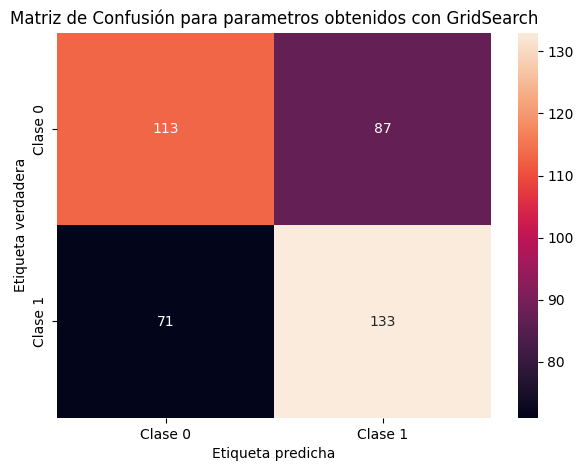


El modelo del Clasificador SVC con los hiperparanetros mas optimos segun RandomSearch:

> Distribución de muestras:0.2
> Parametro de penalizacion C: 9.042837610739259
> Kernel: rbf
> gamma: scale

 Obtuvo una precisión media de =  0.6497210167389956 
 Accuracy: 0.6287128712871287

              precision    recall  f1-score   support

           0       0.63      0.59      0.61       200
           1       0.62      0.66      0.64       204

    accuracy                           0.63       404
   macro avg       0.63      0.63      0.63       404
weighted avg       0.63      0.63      0.63       404



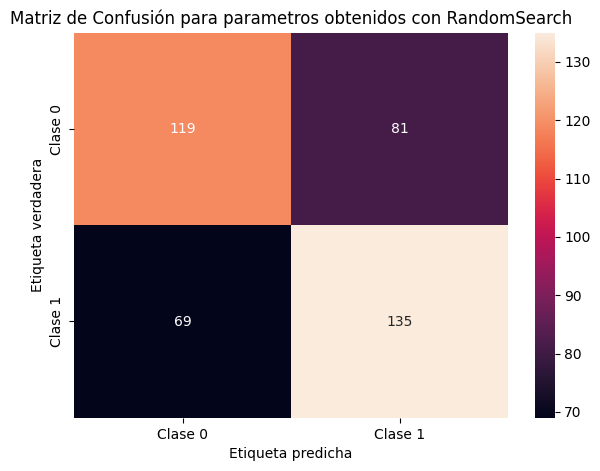

In [ ]:
# Define el clasificador SVC_GS y SVC_RS
svc_GS = SVC()
svc_RS = SVC()

# Defino el diccionario de hiperparámetros y sus valores posibles
param_grid_GS= {
    'C': [0.1, 1, 10],
    'kernel': ['linear', 'rbf'],
    'gamma': ['scale', 'auto', 0.1, 1]
}

param_dist_RS = {
    'C': uniform(loc=0.1, scale=10),
    'kernel': ['linear', 'rbf'],
    'gamma': ['scale', 'auto', 0.1, 1]
}


# Creo un objeto GridSearchCV
grid_search = GridSearchCV(svc_GS, param_grid_GS, cv=5)
# Creo un objeto RandomizedSearchCV
random_search = RandomizedSearchCV(svc_RS, param_distributions=param_dist_RS, n_iter=10, cv=5)

# Ajusto Grid Search a los datos de entrenamiento
grid_search.fit(X_train, y_train)
# Ajusto Random Search a los datos de entrenamiento
random_search.fit(X_train, y_train)


# Obtengo los mejores hiperparámetros
best_params_GS = grid_search.best_params_
# Obtengo los mejores hiperparámetros
best_params_RS = random_search.best_params_


# Creo un modelo SVC con los mejores hiperparámetros
best_svc_GS = SVC(C=best_params_GS['C'], kernel=best_params_GS['kernel'], gamma=best_params_GS['gamma'])
best_svc_RS = SVC(C=best_params_RS['C'], kernel=best_params_RS['kernel'], gamma=best_params_RS['gamma'])


# Entreno el mejor modelo SVC
best_svc_GS.fit(X_train, y_train)
best_svc_RS.fit(X_train, y_train)

# Realizo predicciones con el mejor modelo
y_pred_GS= best_svc_GS.predict(X_test)
y_pred_RS = best_svc_RS.predict(X_test)


# Evaluar el rendimiento
#para GS
score = best_svc_GS.score(X_train, y_train)
accuracy = accuracy_score(y_test, y_pred_GS)
report = classification_report(y_test, y_pred_GS)
confusion = confusion_matrix(y_test, y_pred_GS)


print('El modelo del Clasificador SVC con los hiperparanetros mas optimos segun GridSearch:')
print()
print(f'> Distribución de muestras:{t_size}')
print('> Parametro de penalizacion C:' , best_params_GS['C'])
print('> Kernel:',best_params_GS['kernel'])
print('> Gamma:', best_params_GS['gamma'])

print('\n Obtuvo una precisión media de =' , '\033[1m\033[91m' ,score, '\033[0m')
print(f' Accuracy: {accuracy}\n')
print(report)


plt.figure(figsize=(7,5))
sns.heatmap(confusion, annot=True, fmt='g', xticklabels=['Clase 0', 'Clase 1'], yticklabels=['Clase 0', 'Clase 1'])
plt.xlabel('Etiqueta predicha')
plt.ylabel('Etiqueta verdadera')
plt.title('Matriz de Confusión para parametros obtenidos con GridSearch')
plt.show()



#para RS
score = best_svc_RS.score(X_train, y_train)
accuracy = accuracy_score(y_test, y_pred_RS)
report = classification_report(y_test, y_pred_RS)
confusion = confusion_matrix(y_test, y_pred_RS)
print()
print('El modelo del Clasificador SVC con los hiperparanetros mas optimos segun RandomSearch:')
print()
print(f'> Distribución de muestras:{t_size}')
print('> Parametro de penalizacion C:' , best_params_RS['C'])
print('> Kernel:',best_params_RS['kernel'])
print('> gamma:', best_params_RS['gamma'])

print('\n Obtuvo una precisión media de =' , '\033[1m\033[91m' ,score, '\033[0m')
print(f' Accuracy: {accuracy}\n')
print(report)


plt.figure(figsize=(7,5))
sns.heatmap(confusion, annot=True, fmt='g', xticklabels=['Clase 0', 'Clase 1'], yticklabels=['Clase 0', 'Clase 1'])
plt.xlabel('Etiqueta predicha')
plt.ylabel('Etiqueta verdadera')
plt.title('Matriz de Confusión para parametros obtenidos con RandomSearch')
plt.show()

Nota:
Vemos que el clasificador binario SVC mejoro su rendimiento mediante los  hiperparametros obtenidos con el metodo RandomSearch. El cual, resolvio que los mejores hiperparametros para el caso de estudio son:

Hiper Parametros:
> kernel: rbf
>
> c: 9.04
>
> gamma: scale

Prediciendo corectamente 119 muestras de target 0 de un total de 200 muestras de la misma clase. Y 135 muestras de target 1 de un total de 204 muestras de la misma clase.



HiperParametros para Bayes

Mejor parametro: {'var_smoothing': 1e-12}
Mejor score: 0.5864796261754129
Presicion del modelo: 
0.5655737704918032
Reporte de Clasificación:

              precision    recall  f1-score   support

           0       0.59      0.47      0.52       200
           1       0.57      0.68      0.62       204

    accuracy                           0.57       404
   macro avg       0.58      0.57      0.57       404
weighted avg       0.58      0.57      0.57       404



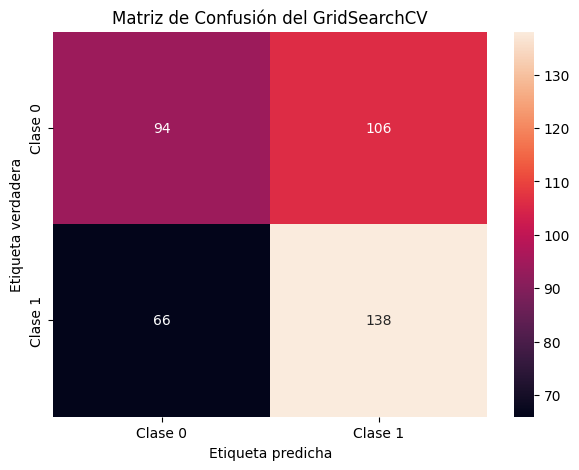

Mejor parametro: {'var_smoothing': 0.0031913551082746773}
Mejor score: 0.5864796261754129
Presicion del modelo: 
0.5655737704918032
Reporte de Clasificación:

              precision    recall  f1-score   support

           0       0.59      0.47      0.52       200
           1       0.57      0.68      0.62       204

    accuracy                           0.57       404
   macro avg       0.58      0.57      0.57       404
weighted avg       0.58      0.57      0.57       404



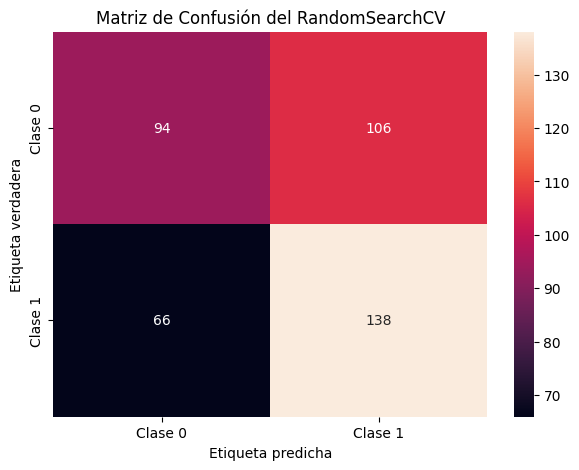

In [ ]:
#creo un modelo de regresion logistica para Gridsearch y Randomsearch
model_Grid = GaussianNB()
model_Random = GaussianNB()
# Defino la cuadrícula de valores de hiperparámetros
param_grid = {
    'var_smoothing': [1e-12,1e-9, 1e-6,1e-3]
}
param_Random={
    'var_smoothing': uniform(1e-12,1e-2)
}

# Definir la herramienta GridSearchCV
grid_search = GridSearchCV(model_Grid,param_grid, scoring='accuracy',cv=5)
# Definir la herramienta RandomizedSearchCV
random_search = RandomizedSearchCV(model_Random,param_distributions=param_Random,scoring='accuracy',cv=5)
# Entrenar los modelos
grid_search.fit(X_train, y_train)
random_search.fit(X_train,y_train)

# Obtengo los mejores valores de hiperparámetros
print("=========================================================================")
print("Mejor parametro:", grid_search.best_params_)
print("Mejor score:", grid_search.best_score_)
#realizo el modelo con los mejores parametros y la matriz de confusion para GridSearch
best_paramsGrid=grid_search.best_params_
model_Grid_best = GaussianNB(var_smoothing=best_paramsGrid['var_smoothing'])
model_Grid_best.fit(X_train,y_train)
y_pred=model_Grid_best.predict(X_test)
precision = precision_score(y_test,y_pred)
print("Presicion del modelo: ")
print(precision)
#imprimo resultados y matriz de confusion
print("Reporte de Clasificación:\n")
print(classification_report(y_test, y_pred))
c = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(7,5))
sns.heatmap(c, annot=True, fmt='g', xticklabels=['Clase 0', 'Clase 1'], yticklabels=['Clase 0', 'Clase 1'])
plt.xlabel('Etiqueta predicha')
plt.ylabel('Etiqueta verdadera')
plt.title('Matriz de Confusión del GridSearchCV')
plt.show()

# Obtengo los mejores valores de hiperparámetros
print("=========================================================================")
print("Mejor parametro:", random_search.best_params_)
print("Mejor score:", random_search.best_score_)

#realizo el modelo con los mejore parametros y la matriz de confusion para RandomizedSearch
best_paramsRandom = random_search.best_params_
model_Random_best = GaussianNB(var_smoothing=best_paramsRandom['var_smoothing'])
model_Random_best.fit(X_train,y_train)
y_pred=model_Random_best.predict(X_test)
precision = precision_score(y_test,y_pred)
print("Presicion del modelo: ")
print(precision)
#imprimo resultados y matriz de confusion
print("Reporte de Clasificación:\n")
print(classification_report(y_test, y_pred))
c = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(7,5))
sns.heatmap(c, annot=True, fmt='g', xticklabels=['Clase 0', 'Clase 1'], yticklabels=['Clase 0', 'Clase 1'])
plt.xlabel('Etiqueta predicha')
plt.ylabel('Etiqueta verdadera')
plt.title('Matriz de Confusión del RandomSearchCV')
plt.show()

Nota: Se llega a apreciar que aunque se cambie el hiperparametro de var_smoothing, el mismo mantiene en el Gridsearch y el Randomsearch, una presicion del 0.56 lo cual se mantiene en la presicion obtenida sin modificar ningun hiperparametro por lo cual, la decision sera mantener el modelo sin modificaciones.

Hiperparametros para Arbol de decision


El modelo del Clasificador DTC con los hiperparanetros mas optimos segun GridSearch:

> Distribución de muestras:0.2
> Criterio: entropy
> max_depth: 10
> min_samples_split: 2
> min_samples_leaf: 1

 Obtuvo una precisión media de =  0.6503409795412275 
 Accuracy: 0.5470297029702971

              precision    recall  f1-score   support

           0       0.54      0.62      0.58       200
           1       0.56      0.47      0.51       204

    accuracy                           0.55       404
   macro avg       0.55      0.55      0.54       404
weighted avg       0.55      0.55      0.54       404



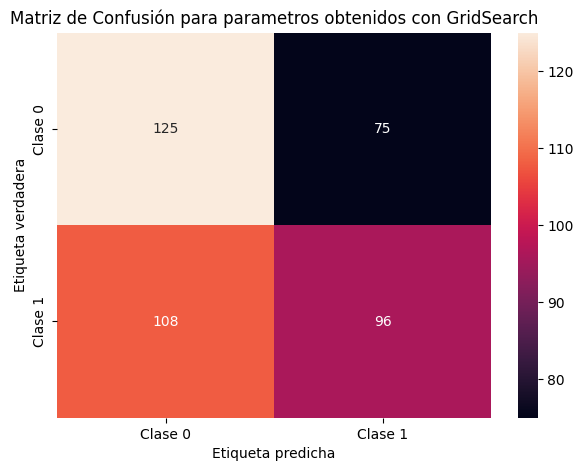

El modelo del Clasificador DTC con los hiperparanetros mas optimos segun RandomSearch:

> Distribución de muestras:0.2
> Criterio: gini
> max_depth: 10
> min_samples_split: 2
> min_samples_leaf: 1

 Obtuvo una precisión media de =  0.6503409795412275 
 Accuracy: 0.5717821782178217

              precision    recall  f1-score   support

           0       0.55      0.71      0.62       200
           1       0.61      0.44      0.51       204

    accuracy                           0.57       404
   macro avg       0.58      0.57      0.56       404
weighted avg       0.58      0.57      0.56       404



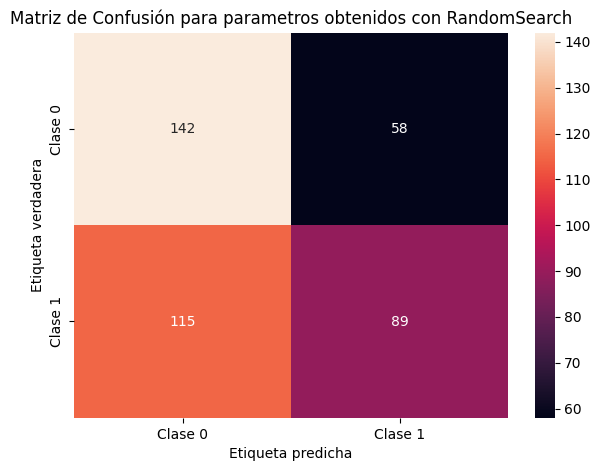

In [ ]:
# Define el clasificador de Árbol de Decisión GS y RS
dtc_GS = DecisionTreeClassifier()
dtc_RS = DecisionTreeClassifier()

# Define el diccionario de hiperparámetros y sus valores posibles para GS y RS
param_grid = {
    'criterion': ['gini', 'entropy'],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

param_dist = {
    'criterion': ['gini', 'entropy'],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': randint(2, 11),
    'min_samples_leaf': randint(1, 5)
}

# Creo un objeto GridSearchCV
grid_search = GridSearchCV(dtc_GS, param_grid, cv=5)
# Creo un objeto RandomizedSearchCV
random_search = RandomizedSearchCV(dtc_RS, param_distributions=param_dist, n_iter=10, cv=5)

# Ajusto Grid Search y Random Search a los datos de entrenamiento
grid_search.fit(X_train, y_train)
random_search.fit(X_train, y_train)

# Obtengo los mejores hiperparámetros
best_params_GS = grid_search.best_params_
best_params_RS = random_search.best_params_


# Creo un modelo de Árbol de Decisión con los mejores hiperparámetros obtenidos del GS y RS
best_dtc_GS = DecisionTreeClassifier(criterion=best_params_GS['criterion'], max_depth=best_params_GS['max_depth'],
                                  min_samples_split=best_params_GS['min_samples_split'],
                                  min_samples_leaf=best_params_GS['min_samples_leaf'])

best_dtc_RS = DecisionTreeClassifier(criterion=best_params_RS['criterion'], max_depth=best_params_RS['max_depth'],
                                  min_samples_split=best_params_RS['min_samples_split'],
                                  min_samples_leaf=best_params_RS['min_samples_leaf'])


# Entreno el mejor modelo de Árbol de Decisión
best_dtc_GS.fit(X_train, y_train)
best_dtc_RS.fit(X_train, y_train)


# Realizo predicciones con el mejor modelo GS
y_pred_GS = best_dtc_GS.predict(X_test)
y_pred_RS = best_dtc_RS.predict(X_test)

# Evaluo el rendimiento del mejor modelo
#para GS
accuracy = accuracy_score(y_test, y_pred_GS)
report = classification_report(y_test, y_pred_GS)
confusion = confusion_matrix(y_test, y_pred_GS)

print()
print('El modelo del Clasificador DTC con los hiperparanetros mas optimos segun GridSearch:')
print()
print(f'> Distribución de muestras:{t_size}')
print('> Criterio:' ,best_params_GS['criterion'] )
print('> max_depth:',best_params_GS['max_depth'])
print('> min_samples_split:',best_params_GS['min_samples_split'] )
print('> min_samples_leaf:', best_params_GS['min_samples_leaf'])


print('\n Obtuvo una precisión media de =' , '\033[1m\033[91m' ,score, '\033[0m')
print(f' Accuracy: {accuracy}\n')
print(report)


plt.figure(figsize=(7,5))
sns.heatmap(confusion, annot=True, fmt='g', xticklabels=['Clase 0', 'Clase 1'], yticklabels=['Clase 0', 'Clase 1'])
plt.xlabel('Etiqueta predicha')
plt.ylabel('Etiqueta verdadera')
plt.title('Matriz de Confusión para parametros obtenidos con GridSearch')
plt.show()

#para RS
accuracy = accuracy_score(y_test, y_pred_RS)
report = classification_report(y_test, y_pred_RS)
confusion = confusion_matrix(y_test, y_pred_RS)

print('El modelo del Clasificador DTC con los hiperparanetros mas optimos segun RandomSearch:')
print()
print(f'> Distribución de muestras:{t_size}')
print('> Criterio:' ,best_params_RS['criterion'] )
print('> max_depth:',best_params_RS['max_depth'])
print('> min_samples_split:',best_params_RS['min_samples_split'] )
print('> min_samples_leaf:', best_params_RS['min_samples_leaf'])


print('\n Obtuvo una precisión media de =' , '\033[1m\033[91m' ,score, '\033[0m')
print(f' Accuracy: {accuracy}\n')
print(report)


plt.figure(figsize=(7,5))
sns.heatmap(confusion, annot=True, fmt='g', xticklabels=['Clase 0', 'Clase 1'], yticklabels=['Clase 0', 'Clase 1'])
plt.xlabel('Etiqueta predicha')
plt.ylabel('Etiqueta verdadera')
plt.title('Matriz de Confusión para parametros obtenidos con RandomSearch')
plt.show()


Nota:
 Despues de varias iteraciones de la celda anterio, los dos modelos (GridSearch y RandomSearch) no pudieron resolver un conjunto de hiperparametros que dieran buenos resultados. Por lo que se considera que el mejor resultado del Clasificador DTC, en nuestro caso de estudio, se obtiene con los parametros prestablecidos como se mostro en resultados anteriores, cuando se implemento el clasificador DTC sin parametros.

 Parametros predeterminados:
> criterion: gini
>
> max_depth: none
>
> min_sample_split: 2
>
> min_sample_leaf: 1

  Dando como resultado una precision media de 64.9%. Clasificando 116 traget de clase 0 de un total de 200 muestras de la misma clase. Y 125  target de clase 1 de un total de 204 muestras de la misma clase.

Nota2:
 El que ninguno de los dos metodos para busqueda de hiperparametros, pudiera dar un conjunto optimo de hiperparametros. Puede deberse a un problema de sobreajuste, ya que se esta implementando una profundida de 10 (max_depth: 10). Por lo que,  es probable que se sobreajuste a los datos de entrenamiento y no generalice bien a datos no vistos.

Hiperparametros para Region logistica

Mejor parametro: {'penalty': 'l2', 'solver': 'saga'}
Mejor score: 0.5790512085841202
Presicion del modelo: 
0.5796460176991151
Reporte de Clasificación:

              precision    recall  f1-score   support

           0       0.59      0.53      0.56       200
           1       0.58      0.64      0.61       204

    accuracy                           0.58       404
   macro avg       0.58      0.58      0.58       404
weighted avg       0.58      0.58      0.58       404



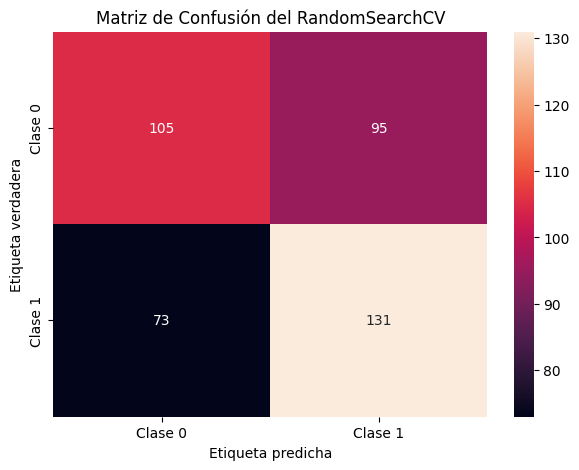

Mejor parametro: {'solver': 'saga', 'penalty': None}
Mejor score: 0.5790531315501029
Presicion del modelo: 
0.5829596412556054
Reporte de Clasificación:

              precision    recall  f1-score   support

           0       0.59      0.54      0.56       200
           1       0.58      0.64      0.61       204

    accuracy                           0.59       404
   macro avg       0.59      0.59      0.59       404
weighted avg       0.59      0.59      0.59       404



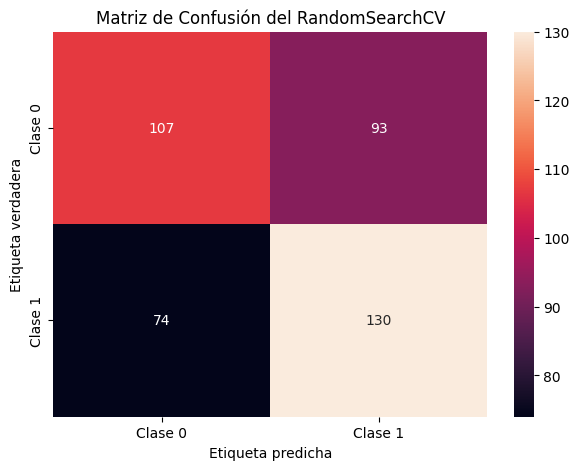

In [ ]:
#creo un modelo de regresion logistica para Gridsearch y Randomsearch
modelLRgrid = LogisticRegression()
modelLRrandom = LogisticRegression()
#parametros gridsearch
params_grid = {
    'solver': ['saga','sag','newton-cg','newton-cholesky','lbfgs'],
    'penalty':['l2',None]
}
#parametros randomsearch
params_random = {
    'solver': ['saga','sag','newton-cg','newton-cholesky','lbfgs'],
    'penalty':['l2',None]
}
#encuentro los parametors para modelos de gridsearch y randomsearch
modelGrid =GridSearchCV(modelLRgrid,params_grid, scoring='accuracy',cv=5)
modelRandom = RandomizedSearchCV(modelLRrandom,params_random, scoring='accuracy',cv=5)

#entreno los modelos
modelGrid.fit(X_train,y_train)
modelRandom.fit(X_train,y_train)

#Obtengo los mejores valores de hiperparámetros
print("=========================================================================")
print("Mejor parametro:", modelGrid.best_params_)
print("Mejor score:", modelGrid.best_score_)
#realizo el modelo con los mejore parametros y la matriz de confusion para GridSearch
params_bestgrid = modelGrid.best_params_
modelbest_grid=LogisticRegression(solver=params_bestgrid['solver'],penalty=params_bestgrid['penalty'])
modelbest_grid.fit(X_train,y_train)
y_pred = modelbest_grid.predict(X_test)
precision = precision_score(y_test,y_pred)
print("Presicion del modelo: ")
print(precision)
#imprimo resultados y matriz de confusion
print("Reporte de Clasificación:\n")
print(classification_report(y_test, y_pred))
c = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(7,5))
sns.heatmap(c, annot=True, fmt='g', xticklabels=['Clase 0', 'Clase 1'], yticklabels=['Clase 0', 'Clase 1'])
plt.xlabel('Etiqueta predicha')
plt.ylabel('Etiqueta verdadera')
plt.title('Matriz de Confusión del RandomSearchCV')
plt.show()

# Obtengo los mejores valores de hiperparámetros
print("=========================================================================")
print("Mejor parametro:", modelRandom.best_params_)
print("Mejor score:", modelRandom.best_score_)
#realizo el modelo con los mejore parametros y la matriz de confusion para RandomizedSearch
params_bestrandom = modelRandom.best_params_
modelbest_random = LogisticRegression(solver=params_bestrandom['solver'], penalty=params_bestrandom['penalty'])
modelbest_random.fit(X_train,y_train)
y_pred=modelbest_random.predict(X_test)

precision = precision_score(y_test,y_pred)
print("Presicion del modelo: ")
print(precision)
#imprimo resultados y matriz de confusion
print("Reporte de Clasificación:\n")
print(classification_report(y_test, y_pred))
c = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(7,5))
sns.heatmap(c, annot=True, fmt='g', xticklabels=['Clase 0', 'Clase 1'], yticklabels=['Clase 0', 'Clase 1'])
plt.xlabel('Etiqueta predicha')
plt.ylabel('Etiqueta verdadera')
plt.title('Matriz de Confusión del RandomSearchCV')
plt.show()

Nota: El modelo que se planteo con diferentes hiperparametros, en el cual el solucionador y la penalizacion fueron probadas. se llega a la conclusion de que los mejores parametros son:
  solver: 'saga',
  penalty: 'l2
resultando una presicion de 0.57. No hubo mejoras con respecto a lo planteado anteriormente ,sin modificar hiperparametros, pero para tener el mismo resultado se usara estos mencionados.

# **Votacion Mayoritaria**


Precisión del clasificador de votación mayoritaria: 0.6386138613861386
 Accuracy: 0.6386138613861386

              precision    recall  f1-score   support

           0       0.59      0.58      0.59       200
           1       0.60      0.61      0.61       204

    accuracy                           0.60       404
   macro avg       0.60      0.60      0.60       404
weighted avg       0.60      0.60      0.60       404



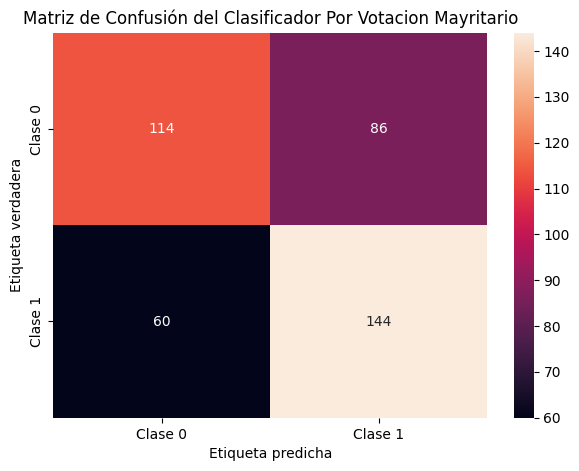

In [ ]:
from sklearn.ensemble import VotingClassifier


# Creo los mejores clasificadores binarios
best_knn = KNeighborsClassifier(n_neighbors= 7, weights= 'uniform', p= 2)
best_svc = SVC(C= 9.04, kernel= 'rbf', gamma= 'scale')
best_dtc= DecisionTreeClassifier(criterion= 'gini', min_samples_split= 2, min_samples_leaf= 1)
best_NB = GaussianNB()
best_Lr = LogisticRegression(solver='saga',penalty='l2')

# Creo un clasificador de votación mayoritaria que combina los tres clasificadores  y obtiene el target de mayor votacion
voting_classifier = VotingClassifier(estimators=[('knn', best_knn), ('svc', best_svc),('dtc',best_dtc),('nb',best_NB),('lr',best_Lr)], voting='hard')

# Entrenar el clasificador de votación mayoritaria en el conjunto de entrenamiento
voting_classifier.fit(X_train, y_train)

# Realizar predicciones en el conjunto de prueba
y_pred = voting_classifier.predict(X_test)

# Calcular la precisión del clasificador de votación mayoritaria
accuracy = accuracy_score(y_test, y_pred)

print("Precisión del clasificador de votación mayoritaria:", accuracy)



# Supongamos que tienes un clasificador de votación mayoritaria 'voting_classifier' y un conjunto de prueba 'X_test' y 'y_test'
# Aquí obtenemos la matriz de confusión para el clasificador de votación mayoritaria
confusion_voting = confusion_matrix(y_test, voting_classifier.predict(X_test))

print(f' Accuracy: {accuracy}\n')
print(report)


plt.figure(figsize=(7,5))
sns.heatmap(confusion_voting, annot=True, fmt='g', xticklabels=['Clase 0', 'Clase 1'], yticklabels=['Clase 0', 'Clase 1'])
plt.xlabel('Etiqueta predicha')
plt.ylabel('Etiqueta verdadera')
plt.title('Matriz de Confusión del Clasificador Por Votacion Mayritario')
plt.show()


Nota:
Al implementar el Clasificador de Votacion Mayoritaria con los clasificadores Knn, SVC, DTC, NB y LR ,con sus mejores hiper parametros. Observamos que a pesar de la mala clasificacion de NB. El clasificador de Votacion Mayoritaria no se vio afectado por los resultados de dicho clasificador y obtuvo una precision media del 63.8% ccomparable con los resultados arrojados por los clasificadores individuales con sus mejores parametros.